# WORK IN PROGRESS
Just a messy notebook I used to generate some synthetic data and labels, to build a simple ML model and get coefficients for decision boundaries, used later in my Rust code on STM32F1 with BME280 environment sensor.

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
n = 10000

In [4]:
# generate random values in range from -10 to 35 for temperature and 0 to 100 for humidity

data = pd.DataFrame({'temp': [random.random() * 45 - 10 for _ in range(n)], 
                     'hum': [random.random() * 100 for _ in range(n)]})

In [5]:
# check if generated values look OK

data.describe()

,temp,hum
count,10000.000000,10000.000000
mean,12.492388,49.817336
std,13.052862,28.783640
min,-9.993413,0.004202
25%,1.052624,25.152596
50%,12.520486,49.894043
75%,23.819750,74.581331
max,34.994183,99.999582


In [6]:
# humidity below 25% is considered 'dry', above 70%: 'humid', otherwise it's moderate

data.loc[data['hum'] < 25, 'hum_cat'] = 'dry'
data.loc[data['hum'] > 70, 'hum_cat'] = 'humid'
data.loc[data['hum_cat'].isna(), 'hum_cat'] = 'moderate'


In [7]:
data.head()

,temp,hum,hum_cat
0,-9.895657,94.587835,humid
1,19.882215,65.536729,moderate
2,10.956352,90.759686,humid
3,3.653477,40.023353,moderate
4,16.621728,18.904795,dry


In [41]:
# temperature below 10°C is considered 'cold', above 22°C: 'warm', otherwise it's moderate

In [8]:
data.loc[data['temp'] < 10, 'temp_cat'] = 'cold'
data.loc[data['temp'] > 22, 'temp_cat'] = 'warm'
data.loc[data['temp_cat'].isna(), 'temp_cat'] = 'moderate'

In [9]:
data.head()

,temp,hum,hum_cat,temp_cat
0,-9.895657,94.587835,humid,cold
1,19.882215,65.536729,moderate,moderate
2,10.956352,90.759686,humid,moderate
3,3.653477,40.023353,moderate,cold
4,16.621728,18.904795,dry,moderate


In [10]:
# combine the two columns
data['weather'] = data['temp_cat'] + ' ' + data['hum_cat']

In [11]:
data.head()

,temp,hum,hum_cat,temp_cat,weather
0,-9.895657,94.587835,humid,cold,cold humid
1,19.882215,65.536729,moderate,moderate,moderate moderate
2,10.956352,90.759686,humid,moderate,moderate humid
3,3.653477,40.023353,moderate,cold,cold moderate
4,16.621728,18.904795,dry,moderate,moderate dry


In [12]:
data['weather'].unique()

array(['cold humid', 'moderate moderate', 'moderate humid',
       'cold moderate', 'moderate dry', 'warm humid', 'cold dry',
       'warm dry', 'warm moderate'], dtype=object)

In [ ]:
# weather is classified as one of three classes: 'nice', 'average', 'bad'

In [13]:
weathercats = ['nice', 'ok', 'bad']

In [15]:
# randomize

random_cats = {}

for idx, cat in enumerate(weathercats):
    output = [weathercats[idx] for _ in range(17)] + [weathercats[idx-1] for _ in range(2)] + [weathercats[idx-2]]
    random_cats[cat] = output

    


In [16]:
random_cats

{'nice': ['nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'nice',
  'bad',
  'bad',
  'ok'],
 'ok': ['ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'ok',
  'nice',
  'nice',
  'bad'],
 'bad': ['bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'bad',
  'ok',
  'ok',
  'nice']}

In [17]:
def randomizer(row, cat):
    return random.choice(random_cats[cat])

In [19]:
data.head()

,temp,hum,hum_cat,temp_cat,weather
0,-9.895657,94.587835,humid,cold,cold humid
1,19.882215,65.536729,moderate,moderate,moderate moderate
2,10.956352,90.759686,humid,moderate,moderate humid
3,3.653477,40.023353,moderate,cold,cold moderate
4,16.621728,18.904795,dry,moderate,moderate dry


In [24]:
data['weather_cat'] = ''

In [25]:
data.head()

,temp,hum,hum_cat,temp_cat,weather,weathercat,weather_cat
0,-9.895657,94.587835,humid,cold,cold humid,,
1,19.882215,65.536729,moderate,moderate,moderate moderate,,
2,10.956352,90.759686,humid,moderate,moderate humid,,
3,3.653477,40.023353,moderate,cold,cold moderate,,
4,16.621728,18.904795,dry,moderate,moderate dry,,


In [26]:
# weather is considered 'nice' if it's either warm and dry, or moderate temperature and dry 
data.loc[data['weather'].isin(['warm dry', 'moderate dry']), 'weather_cat'] \
= data.loc[data['weather'].isin(['warm dry', 'moderate dry']), 'weather_cat'].apply(lambda row: randomizer(row,'nice'))

In [27]:
# weather is considered 'bad' when it's cold and/od humid
data.loc[data['weather'].isin(['cold humid', 'moderate humid', 'cold moderate', 'warm humid', 'cold dry']), 'weather_cat'] \
= data.loc[data['weather'].isin(['cold humid', 'moderate humid', 'cold moderate', 'warm humid', 'cold dry']), 'weather_cat'] \
.apply(lambda row: randomizer(row, 'bad'))

In [28]:
# if it's some other combination, then the weather is considered 'ok'
data.loc[data['weather'].isin(['warm moderate','moderate moderate']), 'weather_cat'] \
= data.loc[data['weather'].isin(['warm moderate','moderate moderate']), 'weather_cat'] \
.apply(lambda row: randomizer(row, 'ok'))

In [29]:
data.head()

,temp,hum,hum_cat,temp_cat,weather,weathercat,weather_cat
0,-9.895657,94.587835,humid,cold,cold humid,,bad
1,19.882215,65.536729,moderate,moderate,moderate moderate,,ok
2,10.956352,90.759686,humid,moderate,moderate humid,,bad
3,3.653477,40.023353,moderate,cold,cold moderate,,bad
4,16.621728,18.904795,dry,moderate,moderate dry,,nice


In [30]:
import matplotlib.pyplot as plt

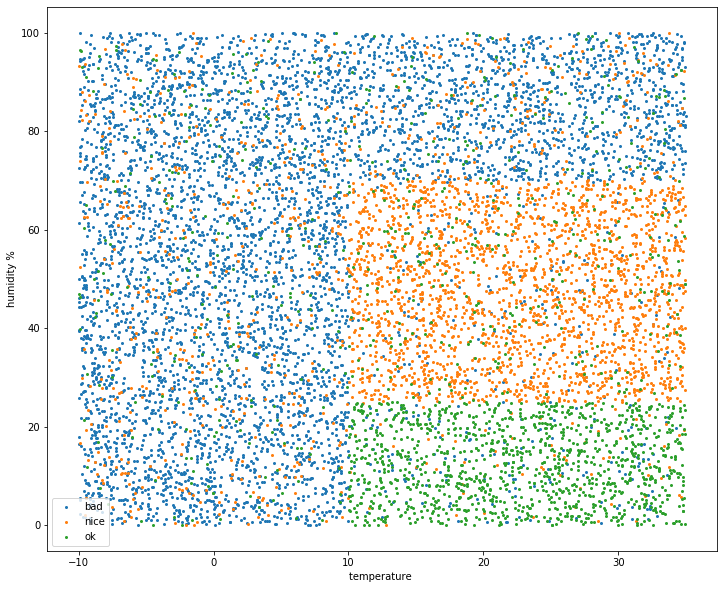

In [31]:
# plot all the data points

fig, ax = plt.subplots(figsize = (12,10))
for cat in data['weather_cat'].unique():
    plt.scatter(x = data.loc[data['weather_cat'] == cat, 'temp'], y = data.loc[data['weather_cat'] == cat, 'hum'], s = 4)
ax.set_ylabel('humidity %')
ax.set_xlabel('temperature ')
ax.legend(['bad', 'nice', 'ok'])

In [32]:
data['weather_cat'] = pd.Categorical(data['weather_cat'])

In [33]:
data['weather_cat_idx'] = data['weather_cat'].cat.codes

In [34]:
# bad is 0, nice is 1, ok is 2

data.head()

,temp,hum,hum_cat,temp_cat,weather,weathercat,weather_cat,weather_cat_idx
0,-9.895657,94.587835,humid,cold,cold humid,,bad,0
1,19.882215,65.536729,moderate,moderate,moderate moderate,,ok,2
2,10.956352,90.759686,humid,moderate,moderate humid,,bad,0
3,3.653477,40.023353,moderate,cold,cold moderate,,bad,0
4,16.621728,18.904795,dry,moderate,moderate dry,,nice,1


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
X = data[['temp', 'hum']]

In [37]:
y = data['weather_cat_idx']

In [38]:
logreg = LogisticRegression(C = 1e5)

In [39]:
logreg.fit(X,y)

/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
logreg.coef_

array([[-0.09970853,  0.0309918 ],
       [ 0.06826359, -0.04702842],
       [ 0.05767628, -0.00212381]])

In [41]:
logreg.intercept_

array([-0.02518554, -0.77952247, -1.6711203 ])

In [42]:
x_min, x_max = X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5, 

In [43]:
y_min, y_max = X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5, 

In [44]:
h = .2 # step in the mesh

In [45]:
import numpy as np

In [46]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [47]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [48]:
Z = Z.reshape(xx.shape)

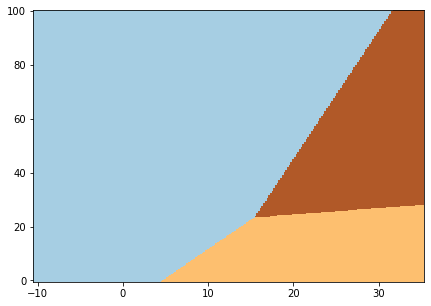

In [49]:
plt.figure(1, figsize = (7,5))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   temp             10000 non-null  float64 
 1   hum              10000 non-null  float64 
 2   hum_cat          10000 non-null  object  
 3   temp_cat         10000 non-null  object  
 4   weather          10000 non-null  object  
 5   weathercat       10000 non-null  object  
 6   weather_cat      10000 non-null  category
 7   weather_cat_idx  10000 non-null  int8    
dtypes: category(1), float64(2), int8(1), object(4)
memory usage: 488.5+ KB


In [51]:
data['weather_cat'].unique()

[bad, ok, nice]
Categories (3, object): [bad, ok, nice]

In [161]:
# get the two boundaries for 'nice' and for 'bad'

In [52]:
data.loc[data['weather_cat'] == 'nice', 'nice'] = 1

In [53]:
data.loc[data['nice'].isna(), 'nice'] = 0 

In [54]:
data.loc[data['weather_cat'] == 'bad', 'bad'] = 1

In [55]:
data.loc[data['bad'].isna(), 'bad'] = 0 

In [56]:
data.head()

,temp,hum,hum_cat,temp_cat,weather,weathercat,weather_cat,weather_cat_idx,nice,bad
0,-9.895657,94.587835,humid,cold,cold humid,,bad,0,0.0,1.0
1,19.882215,65.536729,moderate,moderate,moderate moderate,,ok,2,0.0,0.0
2,10.956352,90.759686,humid,moderate,moderate humid,,bad,0,0.0,1.0
3,3.653477,40.023353,moderate,cold,cold moderate,,bad,0,0.0,1.0
4,16.621728,18.904795,dry,moderate,moderate dry,,nice,1,1.0,0.0


In [ ]:
# logistic regression for 'nice' vs. everything else

In [57]:
X = data[['temp', 'hum']] 


In [58]:
y = data['nice']

In [59]:
logreg.fit(X,y)

/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
W_nice, b_nice = logreg.coef_, logreg.intercept_

In [61]:
W_nice


array([[ 0.06826359, -0.04702842]])

In [62]:
b_nice

array([-0.77952247])

In [63]:
x = np.arange(-10,35)

In [64]:
y = -(x * W_nice[0][0] + b_nice[0]) / W_nice[0][1]

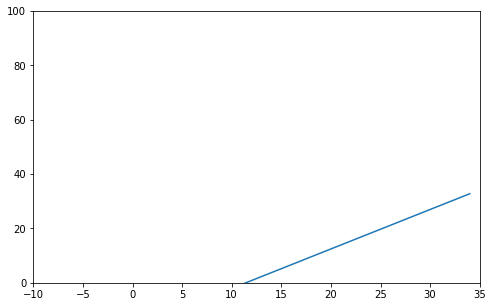

In [65]:
fig, ax = plt.subplots(figsize = (8,5))
ax.set_xlim(-10,35)
ax.set_ylim(0,100)
plt.plot(x, y)

In [66]:
X = data[['temp', 'hum']] 


In [67]:
y = data['bad']

In [68]:
logreg.fit(X,y)

/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
W_bad, b_bad = logreg.coef_, logreg.intercept_

In [70]:
W_bad


array([[-0.09970853,  0.0309918 ]])

In [71]:
b_bad

array([-0.02518554])

In [72]:
t = np.arange(-10,35)

In [76]:
h_nice = -(t * W_nice[0][0] + b_nice[0]) / W_nice[0][1]

In [77]:
h_bad = -(t * W_bad[0][0] + b_bad[0]) / W_bad[0][1]

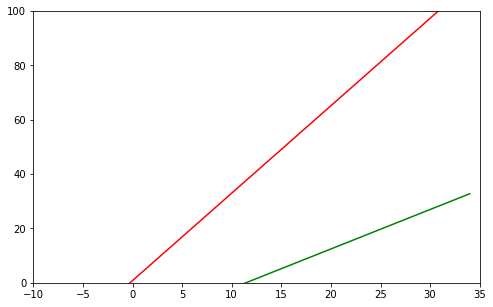

In [75]:
fig, ax = plt.subplots(figsize = (8,5))
ax.set_xlim(-10,35)
ax.set_ylim(0,100)
plt.plot(t, h_nice, c = 'g')
plt.plot(t, h_bad, c = 'r')


In [80]:
samples = [(25,70), (10,15), (24,23), (21,60), (7,60), (23,15), (28,80)]

In [81]:
for sample in samples:
    t, h = sample
    
    h_nice = -(t * W_nice[0][0] + b_nice[0]) / W_nice[0][1]
    h_bad = -(t * W_bad[0][0] + b_bad[0]) / W_bad[0][1]
    
    print("temp {}°C, hum {}% - hum_nice {}%, hum_bad {}%".format(t,h,h_nice, h_bad))
    
    if h >= h_bad:
        print("temp: {}°C, hum: {}% - bad! :(".format(t,h))
    elif h <= h_nice:
        print("temp: {}°C, hum: {}% - nice! :) ".format(t,h))
    else:
        print("temp: {}°C, hum: {}% - it's ok.".format(t,h))
    

temp 25°C, hum 70% - hum_nice 19.71291557867815%, hum_bad 81.24403029375354%
temp: 25°C, hum: 70% - it's ok.
temp 10°C, hum 15% - hum_nice -2.060170511303494%, hum_bad 32.985203098168974%
temp: 10°C, hum: 15% - it's ok.
temp 24°C, hum 23% - hum_nice 18.261376506012706%, hum_bad 78.02677514738124%
temp: 24°C, hum: 23% - it's ok.
temp 21°C, hum 60% - hum_nice 13.906759288016376%, hum_bad 68.37500970826433%
temp: 21°C, hum: 60% - it's ok.
temp 7°C, hum 60% - hum_nice -6.414787729299824%, hum_bad 23.333437659052063%
temp: 7°C, hum: 60% - bad! :(
temp 23°C, hum 15% - hum_nice 16.809837433347266%, hum_bad 74.80952000100895%
temp: 23°C, hum: 15% - nice! :) 
temp 28°C, hum 80% - hum_nice 24.06753279667448%, hum_bad 90.89579573287047%
temp: 28°C, hum: 80% - it's ok.


In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
from sklearn.model_selection import train_test_split


In [85]:
X = data[['hum', 'temp']]

In [86]:
y = data['weather_cat_idx']

In [87]:
poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [89]:
X_train.shape

(7500, 2)

In [90]:
X_poly = poly.fit_transform(X_train)

In [91]:
X_poly.shape

(7500, 5)

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(X_poly, y_train)

/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
lr.score(poly.transform(X_test), y_test)

0.812

In [95]:
lr.coef_

array([[-0.05867425, -0.22381246,  0.00064098,  0.00203191,  0.00057312],
       [-0.11351455,  0.17867957,  0.00097417, -0.00152636, -0.00197617],
       [ 0.16371461,  0.09708219, -0.00176706,  0.00037869, -0.00162209]])

In [96]:
lr.intercept_

array([ 2.31396237, -0.29475986, -4.66592429])

In [ ]:
'''
Once the model is fit we call .coef_ and .intercept_ to see the predicted coefficients and intercept term. 
Following the linear form Y = Mx + b we can now see the linear equation for our decision boundary is 
Sepal_Length * (0.4437) + Petal_Width * (-4.6018) + 0.9626. 

so that's SL * W[0] + PW * W[1] + b

SL is X, PW is Y

so PW * W[1] = -SL * W[0] - b
therefore PW = -(SL*W[0] + b) / W[1]
'''



In [98]:
X = data[['hum', 'temp']]

In [99]:
y = data['nice']

In [100]:
poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [102]:
X_train.shape

(7500, 2)

In [103]:
X_poly = poly.fit_transform(X_train)

In [104]:
X_poly.shape

(7500, 5)

In [105]:
lr = LogisticRegression()

In [106]:
lr.fit(X_poly, y_train)

/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
lr.score(poly.transform(X_test), y_test)

0.8984

In [110]:
W = lr.coef_

In [112]:
W

array([[-0.08605272,  0.19827515,  0.00075882, -0.00193614, -0.00202101]])

In [111]:
b = lr.intercept_

In [113]:
b

array([-0.95894752])

In [ ]:
'''
f(x,y; c) = c_0 + c_1 x + c_2 y + c_3 x² + c_4 x y + c_5 y²


linear: 

f(x,y;c) = c_0 + c_1 x + c_2 y
Y = Mx + b -> Y*c2 = - x*c1  - c0 -> Y = -(x*c1 + c0) / c2



c4xy + c5y2 +c2y = - c0 - c1x - c3x2

(c4x + c5y + c2)y = -c0 - c1x - c3x2


'''



In [114]:
def result(x,y):
    return b[0] + W[0][0]*x + W[0][1]*y + W[0][2]*x*x + W[0][3]*x*y + W[0][4]*y*y

In [115]:
samples = [(25,70), (10,15), (24,23), (21,60), (7,60), (23,15), (28,80)]

In [116]:
for sample in samples:
    print(sample[0], sample[1], result(sample[0], sample[1]))

25 70 -2.0479145113402613
10 15 0.4853876847428495
24 23 -0.16466236681893487
21 60 -0.250062424707326
7 60 2.2835722283676736
23 15 -0.6853089916736277
28 80 -4.1828858438687675
